In [2]:
from IPython.display import Latex, HTML, Markdown

def hide_input_code():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)



In [3]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

In [21]:
%%javascript
 MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
    ["resetEquationNumbers", MathJax.InputJax.TeX],
    ["PreProcess", MathJax.Hub],
    ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

In [22]:
Markdown('''
<script type="text/x-mathjax-config">
MathJax.Hub.Config({
tex2jax: {
inlineMath: [['$','$'], ['\\(','\\)']],
processEscapes: true},
jax: ["input/TeX","input/MathML","input/AsciiMath","output/CommonHTML"],
extensions: ["tex2jax.js","mml2jax.js","asciimath2jax.js","MathMenu.js","MathZoom.js","AssistiveMML.js", "[Contrib]/a11y/accessibility-menu.js"],
TeX: {
extensions: ["AMSmath.js","AMSsymbols.js","noErrors.js","noUndefined.js"],
equationNumbers: {
autoNumber: "AMS"
}
}
});
</script>
''')


<script type="text/x-mathjax-config">
MathJax.Hub.Config({
tex2jax: {
inlineMath: [['$','$'], ['\(','\)']],
processEscapes: true},
jax: ["input/TeX","input/MathML","input/AsciiMath","output/CommonHTML"],
extensions: ["tex2jax.js","mml2jax.js","asciimath2jax.js","MathMenu.js","MathZoom.js","AssistiveMML.js", "[Contrib]/a11y/accessibility-menu.js"],
TeX: {
extensions: ["AMSmath.js","AMSsymbols.js","noErrors.js","noUndefined.js"],
equationNumbers: {
autoNumber: "AMS"
}
}
});
</script>


Logical AND Problem

In [23]:
from IPython.display import Latex, HTML, Markdown
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline

hide_input_code()

def get_figure(size=(8, 8)):
    fig = plt.figure(figsize=size)
    ax = fig.gca()
    ax.set_axisbelow(True)
    ax.patch.set_alpha(0.)
    label_color = 'white'
    ax.set_title(ax.get_title(), color=label_color)
    plt.grid(linewidth=.2)
    
    [ax.spines[spine].set_color(label_color) for spine in ax.spines]
    ax.xaxis.label.set_color(label_color)
    ax.yaxis.label.set_color(label_color)
    ax.tick_params(axis='x', colors=label_color)
    ax.tick_params(axis='y', colors=label_color)
    
    
    return ax
    

def plot_problem(ax, data, targets, title=''):
    for sample_index in range(len(data)):
        sample_input = data[sample_index].astype(int)
        ground_truth = targets[sample_index]

        if ground_truth: # If output is True
            sample_marker = 'P'
            sample_color = 'limegreen'
        else:
            sample_marker = 'X'
            sample_color = 'r'
            
        plt.plot(sample_input[0],
                sample_input[1],
                sample_marker,
                color=sample_color,
                markersize=13,
                label=ground_truth)
    plt.axis('equal')
    limits = [-.25, 1.25, -.25, 1.25]
   
    plt.grid(linewidth=.2)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    handles, labels = ax.get_legend_handles_labels()
    legends = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*legends))
    plt.title(title)
    
    
    ticks = np.arange(limits[0], 2*limits[1], .25)
    tick_labels = [str(tick) for tick in ticks]
    tick_labels[np.where(ticks == 0)[0][0]] += '\n(False)'
    tick_labels[np.where(ticks == 1)[0][0]] += '\n(True)'
    ax.set_yticks(ticks)    
    ax.set_yticklabels(tick_labels)
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels)
    plt.axis(limits)

    
    return legends


def plot_classifier(legends,
                    threshold=.5,
                    x1=True,
                    fill_alpha=.4,
                    linewidth=3,
                    fontsize=16,
                    positive_classification_text='',
                    negative_classification_text='',):    
    
    limits = [-.25, 1.25]
    
    plt.fill_betweenx(limits,
                      [threshold]*2,
                      [max(limits) if x1 else -max(limits)]*2,
                      alpha=fill_alpha,
                      color='green' if x1 else 'red')
    classification_plot = plt.plot([threshold]*2,
                                   limits,
                                   linewidth=linewidth)
    if positive_classification_text:
        plt.text(threshold+.05, .4, positive_classification_text, fontsize=fontsize, color='limegreen')
    if negative_classification_text:
        plt.text(threshold-.4, .4, negative_classification_text, fontsize=fontsize, color='orange')
        
    plt.legend(*zip(*legends))
    plt.axis(limits*2)


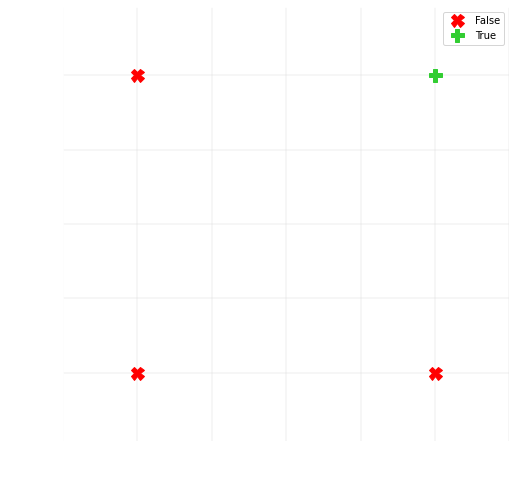

In [24]:
ax = get_figure()

data = [np.array([False, False]),
        np.array([True,  False]),
        np.array([False, True]),
        np.array([True,  True])]

targets = [False,
           False,
           False,
           True]

legends = plot_problem(ax, data, targets)
plt.show()

Solving the problem statistically

In [26]:
hide_input_code()
Latex('''
For predicting output $y\in \{true, false\}$, our prior belief (naïve bayes) is
\\begin{align}
\\begin{cases}
p(y=true) = \\dfrac{1}{4} = 0.25, \\\ 
p(y=false) = 1 - p(y=true) = 0.75.
\\end{cases}
\\end{align}
Maximizing belief, we predict
\\begin{align}
y = argmax(p(y)) = false
\\end{align}
''')

<IPython.core.display.Latex object>

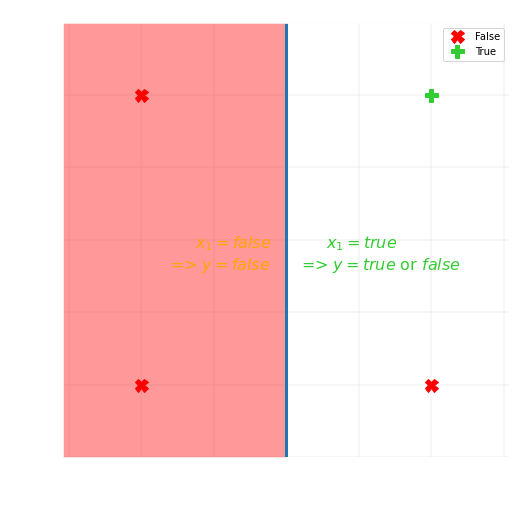

In [27]:
hide_input_code()
ax = get_figure()
legends = plot_problem(ax, data, targets, title='Logical AND')

plot_classifier(legends, x1=False,
                positive_classification_text='     '+r'$x_1=true$'+'\n=> '+r'$y = true$'+' or '+r'$false$',
                negative_classification_text='     '+r'$x_1=false$'+'\n=> '+r'$y = false$')

In [35]:
hide_input_code()

Latex('''
Given $x_1=false,$ we can with bayes theorem
\\begin{align}
p(A \mid B) = \\dfrac{p(B \mid A)\\:p(A)}{p(B)} 
\\end{align}

update our posterior belief
\\begin{align}
p(y=true \mid x_1=false)&= \\dfrac{p(x_1 = false \mid y=true)\\:p(y=true)}{p(x_1=false)} \\\ 
&= \\dfrac{0 \cdot 0.25}{1} = 0, \\\ 
\implies y &= false.
\\end{align}
''')

<IPython.core.display.Latex object>

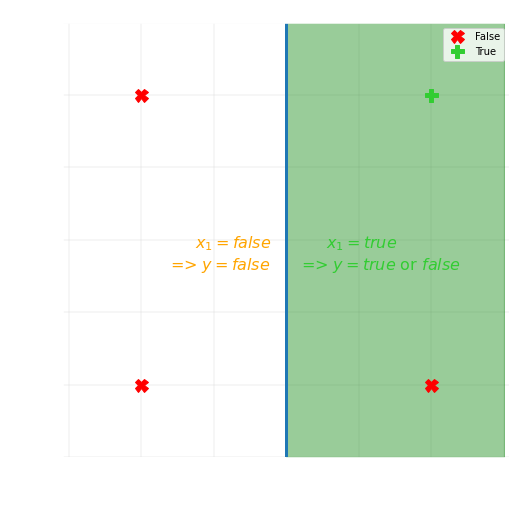

In [17]:
hide_input_code()
ax = get_figure()
legends = plot_problem(ax, data, targets, title='Logical AND')
plot_classifier(legends, x1=True, 
                positive_classification_text='     '+r'$x_1=true$'+'\n=> '+r'$y = true$'+' or '+r'$false$',
                negative_classification_text='     '+r'$x_1=false$'+'\n=> '+r'$y = false$')

In [39]:
hide_input_code()
Latex('''
Given $x_1=true,$ our posterior belief
\\begin{align}
p(y=true \mid x_1=true) &= \\dfrac{p(x_1 = true \mid y=true)\\:p(y=true)}{p(x_1=true)} \\\ 
&= \\dfrac{1 \cdot 0.25}{p(x_1 = true \mid y=true)\\:p(y=true) + p(x_1 = true \mid y=false)\\:p(y=false)} = 0.25, \\\ 
\implies y &= false.
\\end{align}
''')

<IPython.core.display.Latex object>